In [1]:
import pandas as pd
import os
import string
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams.update({'font.size': 13})

In [3]:
def read_document_data(filepath):

    try:
        with open(filepath, 'r') as f:
            data_dict = json.load(f)
    except Exception as e:
        data_dict = dict()
        print(e)

    return data_dict

def get_avg_precision(query_name):
    
    for prec in avg_precision_data:
    
        x = []
        y = []
        query = None

        for key, value in prec.items():
            if key != 'query':
                x.append(int(key))
                y.append(value)
            else:
                query = value
                
        print(x)
        print(y)
        
def get_df_data(df, data_val):
    
    col_names = [f'S0 IR0 exp score {data_val}', f'S1 IR1 exp score {data_val}']
    for col in range(2, 8):
        col_names.append(f'S{col} IR2 exp score {data_val}')
    
    return df[df['key'].isin(col_names)]

In [4]:
avg_precision_data = []
filepath = os.getcwd()+'/../dataframes/average_precision_query/IR1/'

for file in os.listdir(filepath):
    avg_precision_data.append(read_document_data(filepath+file))

In [5]:
def get_data_df():
    
    df = pd.read_excel(os.getcwd()+'/../dataframes/hdbscan_cluster_dataframes_updated_nc_small_cdd/hdbscan_clustering_output_small_cdd_df_1.xlsx')
    val_dict = df.mean().to_dict()

    val_df = pd.DataFrame(val_dict.items(), columns=['key', 'DateValue'])
    
    return val_df

In [6]:
val_df = get_data_df()

In [7]:
val_df.key.values

array(['Cluster cnt', 'Silhouette score', 'Targeted cnt',
       'Targeted document cnt', 'Total document cnt',
       'Ratio of targeted doc', 'Missed total doc', 'Missed perfekt doc',
       'Missed relevant doc', 'Missed irrelevant doc',
       'Missed negative doc', 'Missed un-labelled doc',
       'S0 IR0 exp score 5', 'S0 IR0 exp score 10', 'S0 IR0 exp score 15',
       'S0 IR0 exp score 20', 'S0 IR0 exp score 25',
       'S0 IR0 exp score avg', 'S0 IR0 exp score ap',
       'S1 IR1 exp score 5', 'S1 IR1 exp score 10', 'S1 IR1 exp score 15',
       'S1 IR1 exp score 20', 'S1 IR1 exp score 25',
       'S1 IR1 exp score avg', 'S2 IR2 exp score 5',
       'S2 IR2 exp score 10', 'S2 IR2 exp score 15',
       'S2 IR2 exp score 20', 'S2 IR2 exp score 25',
       'S2 IR2 exp score avg', 'S3 IR2 exp score 5',
       'S3 IR2 exp score 10', 'S3 IR2 exp score 15',
       'S3 IR2 exp score 20', 'S3 IR2 exp score 25',
       'S3 IR2 exp score avg', 'S4 IR2 exp score 5',
       'S4 IR2 exp sco

In [8]:
get_df_data(val_df, 'avg')

,key,DateValue
17,S0 IR0 exp score avg,2.361824
24,S1 IR1 exp score avg,0.300000
30,S2 IR2 exp score avg,0.303882
36,S3 IR2 exp score avg,0.198882
42,S4 IR2 exp score avg,0.316000
48,S5 IR2 exp score avg,0.316353
54,S6 IR2 exp score avg,0.315882
60,S7 IR2 exp score avg,0.292647


In [9]:
df_5 = get_df_data(val_df, '5')
df_10 = get_df_data(val_df, '10')
df_15 = get_df_data(val_df, '15')
df_20 = get_df_data(val_df, '20')
df_25 = get_df_data(val_df, '25')

In [10]:
idx_5_values = df_5.DateValue.values
idx_10_values = df_10.DateValue.values
idx_15_values = df_15.DateValue.values
idx_20_values = df_20.DateValue.values
idx_25_values = df_25.DateValue.values

In [11]:
ir_systems = ['IR0', 'IR1', 'IR2', 'IR3', 'IR4', 'IR5', 'IR6', 'IR7']

In [12]:
mae_df = pd.DataFrame({
    'ir_systems': ir_systems,
    'idx_5_values': idx_5_values,
    'idx_10_values': idx_10_values,
    'idx_15_values': idx_15_values,
    'idx_20_values': idx_20_values,
    'idx_25_values': idx_25_values
})

mae_df

,ir_systems,idx_5_values,idx_10_values,idx_15_values,idx_20_values,idx_25_values
0,IR0,0.787824,1.575412,2.363294,3.151059,3.931294
1,IR1,1.117647,1.823529,2.941176,3.941176,4.470588
2,IR2,1.058824,1.647059,2.941176,3.764706,4.352941
3,IR3,0.529412,1.058824,2.058824,3.058824,3.823529
4,IR4,1.117647,1.941176,3.294118,3.941176,4.352941
5,IR5,1.117647,1.941176,3.294118,3.941176,4.411765
6,IR6,1.117647,1.941176,3.294118,3.882353,4.411765
7,IR7,0.970588,1.852941,2.470588,3.176471,4.117647


In [13]:
mae_df['idx_5_values'] = mae_df.apply(lambda x:round(x['idx_5_values'], 2), axis=1)
mae_df['idx_10_values'] = mae_df.apply(lambda x:round(x['idx_10_values'], 2), axis=1)
mae_df['idx_15_values'] = mae_df.apply(lambda x:round(x['idx_15_values'], 2), axis=1)
mae_df['idx_20_values'] = mae_df.apply(lambda x:round(x['idx_20_values'], 2), axis=1)
mae_df['idx_25_values'] = mae_df.apply(lambda x:round(x['idx_25_values'], 2), axis=1)

<AxesSubplot:>

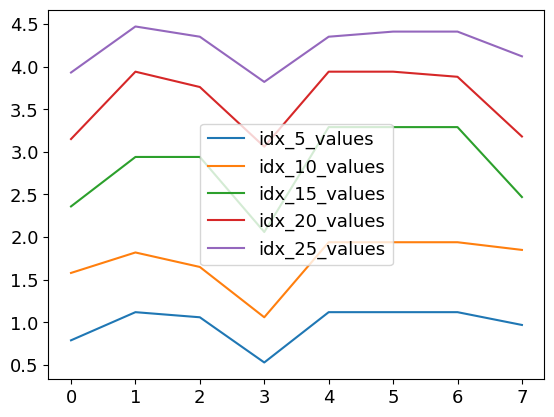

In [14]:
mae_df.plot()

In [15]:
mae_df_tp = mae_df.T
mae_df_tp

,0,1,2,3,4,5,6,7
ir_systems,IR0,IR1,IR2,IR3,IR4,IR5,IR6,IR7
idx_5_values,0.79,1.12,1.06,0.53,1.12,1.12,1.12,0.97
idx_10_values,1.58,1.82,1.65,1.06,1.94,1.94,1.94,1.85
idx_15_values,2.36,2.94,2.94,2.06,3.29,3.29,3.29,2.47
idx_20_values,3.15,3.94,3.76,3.06,3.94,3.94,3.88,3.18
idx_25_values,3.93,4.47,4.35,3.82,4.35,4.41,4.41,4.12


In [16]:
mae_df_tp.columns = ir_systems

In [17]:
ir0_data = mae_df_tp['IR0'].values
ir1_data = mae_df_tp['IR1'].values
ir2_data = mae_df_tp['IR2'].values
ir3_data = mae_df_tp['IR3'].values
ir4_data = mae_df_tp['IR4'].values
ir7_data = mae_df_tp['IR7'].values

In [18]:
x = [5, 10, 15, 20, 25]

data_preproc = pd.DataFrame({
    'Top-k documents': x,
    'IR0': ir0_data[1:],
    'IR1': ir1_data[1:],
    'IR2': ir2_data[1:],
    'IR3': ir3_data[1:],
    'IR4': ir4_data[1:],
    'IR7': ir7_data[1:]})

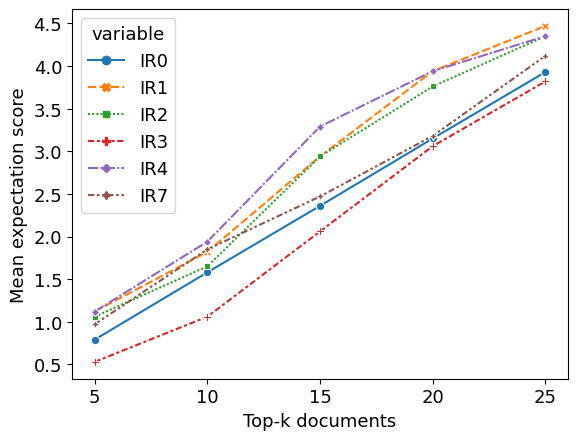

In [19]:
ax = sns.lineplot(x='Top-k documents', y='value', hue='variable',  data=pd.melt(data_preproc, ['Top-k documents']), style="variable", markers=True, dashes=True)
ax.set(ylabel='Mean expectation score')
ax.set_xticks(x)

plt.savefig('mean_expectation_score'+'.png', bbox_inches='tight')
plt.show()

<AxesSubplot:xlabel='Top-k documents', ylabel='IR0'>

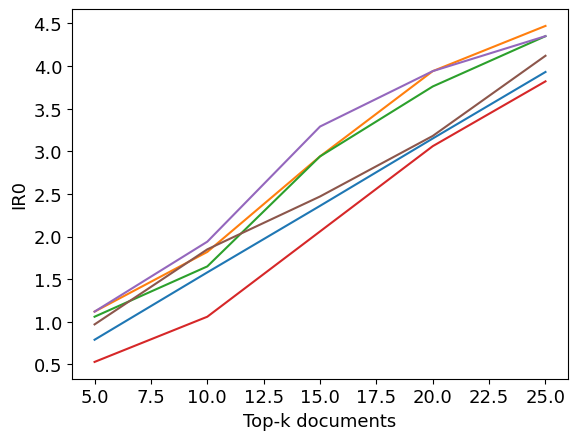

In [20]:
sns.lineplot(x='Top-k documents', y='IR0', data=data_preproc)
sns.lineplot(x='Top-k documents', y='IR1', data=data_preproc)
sns.lineplot(x='Top-k documents', y='IR2', data=data_preproc)
sns.lineplot(x='Top-k documents', y='IR3', data=data_preproc)
sns.lineplot(x='Top-k documents', y='IR4', data=data_preproc)
sns.lineplot(x='Top-k documents', y='IR7', data=data_preproc)

In [21]:
get_df_data(val_df, '10')

,key,DateValue
13,S0 IR0 exp score 10,1.575412
20,S1 IR1 exp score 10,1.823529
26,S2 IR2 exp score 10,1.647059
32,S3 IR2 exp score 10,1.058824
38,S4 IR2 exp score 10,1.941176
44,S5 IR2 exp score 10,1.941176
50,S6 IR2 exp score 10,1.941176
56,S7 IR2 exp score 10,1.852941


In [22]:
get_df_data(val_df, '15')

,key,DateValue
14,S0 IR0 exp score 15,2.363294
21,S1 IR1 exp score 15,2.941176
27,S2 IR2 exp score 15,2.941176
33,S3 IR2 exp score 15,2.058824
39,S4 IR2 exp score 15,3.294118
45,S5 IR2 exp score 15,3.294118
51,S6 IR2 exp score 15,3.294118
57,S7 IR2 exp score 15,2.470588


In [23]:
get_df_data(val_df, '20')

,key,DateValue
15,S0 IR0 exp score 20,3.151059
22,S1 IR1 exp score 20,3.941176
28,S2 IR2 exp score 20,3.764706
34,S3 IR2 exp score 20,3.058824
40,S4 IR2 exp score 20,3.941176
46,S5 IR2 exp score 20,3.941176
52,S6 IR2 exp score 20,3.882353
58,S7 IR2 exp score 20,3.176471


In [24]:
get_df_data(val_df, '25')

,key,DateValue
16,S0 IR0 exp score 25,3.931294
23,S1 IR1 exp score 25,4.470588
29,S2 IR2 exp score 25,4.352941
35,S3 IR2 exp score 25,3.823529
41,S4 IR2 exp score 25,4.352941
47,S5 IR2 exp score 25,4.411765
53,S6 IR2 exp score 25,4.411765
59,S7 IR2 exp score 25,4.117647


In [25]:
val_df[val_df['key'].isin(['S0 IR0 exp score ap'])]

,key,DateValue
18,S0 IR0 exp score ap,0.184824
